## Import Libraries

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

pd.set_option("display.max_columns", 570)

## Load Data

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
print("Shape of Train Dataset:", train.shape)
print("Shape of Test Dataset:", test.shape)

Shape of Train Dataset: (7352, 563)
Shape of Test Dataset: (2947, 563)


In [6]:
print("Number of Null Values in Train Dataset:", sum(train.isnull().sum().values))
print("Number of Null Values in Test Dataset:", sum(test.isnull().sum().values))

Number of Null Values in Train Dataset: 0
Number of Null Values in Test Dataset: 0


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB


In [9]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,tBodyAccJerk-std()-Y,tBodyAccJerk-std()-Z,tBodyAccJerk-mad()-X,tBodyAccJerk-mad()-Y,tBodyAccJerk-mad()-Z,tBodyAccJerk-max()-X,tBodyAccJerk-max()-Y,tBodyAccJerk-max()-Z,tBodyAccJerk-min()-X,tBodyAccJerk-min()-Y,tBodyAccJerk-min()-Z,tBodyAccJerk-sma(),tBodyAccJerk-energy()-X,tBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Z,tBodyAccJerk-iqr()-X,tBodyAccJerk-iqr()-Y,tBodyAccJerk-iqr()-Z,tBodyAccJerk-entropy()-X,tBodyAccJerk-entropy()-Y,tBodyAccJerk-entropy()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-sma(),tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerk-std()-X,tBodyGyroJerk-std()-Y,tBodyGyroJerk-std()-Z,tBodyGyroJerk-mad()-X,tBodyGyroJerk-mad()-Y,tBodyGyroJerk-mad()-Z,tBodyGyroJerk-max()-X,tBodyGyroJerk-max()-Y,tBodyGyroJerk-max()-Z,tBodyGyroJerk-min()-X,tBodyGyroJerk-min()-Y,tBodyGyroJerk-min()-Z,tBodyGyroJ

In [10]:
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,tBodyAccJerk-std()-Y,tBodyAccJerk-std()-Z,tBodyAccJerk-mad()-X,tBodyAccJerk-mad()-Y,tBodyAccJerk-mad()-Z,tBodyAccJerk-max()-X,tBodyAccJerk-max()-Y,tBodyAccJerk-max()-Z,tBodyAccJerk-min()-X,tBodyAccJerk-min()-Y,tBodyAccJerk-min()-Z,tBodyAccJerk-sma(),tBodyAccJerk-energy()-X,tBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Z,tBodyAccJerk-iqr()-X,tBodyAccJerk-iqr()-Y,tBodyAccJerk-iqr()-Z,tBodyAccJerk-entropy()-X,tBodyAccJerk-entropy()-Y,tBodyAccJerk-entropy()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-sma(),tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerk-std()-X,tBodyGyroJerk-std()-Y,tBodyGyroJerk-std()-Z,tBodyGyroJerk-mad()-X,tBodyGyroJerk-mad()-Y,tBodyGyroJerk-mad()-Z,tBodyGyroJerk-max()-X,tBodyGyroJerk-max()-Y,tBodyGyroJerk-max()-Z,tBodyGyroJerk-min()-X,tBodyGyroJerk-min()-Y,tBodyGyroJerk-min()-Z,tBodyGyroJ

For predicting the activity, magnitude columns have distinct representation. We can easly separete Standing, Sitting, Laying from Walking, Walking_Downstairs, Walking_Upstairs.

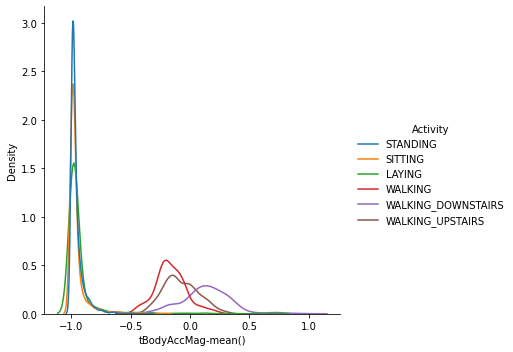

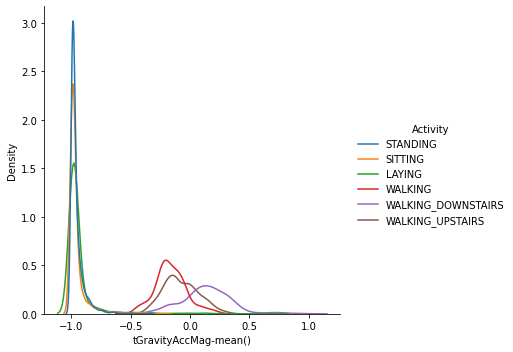

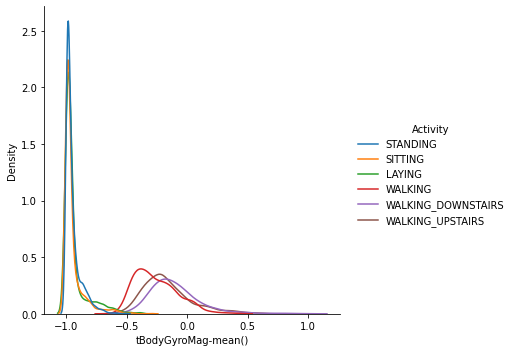

In [11]:
sns.displot(x='tBodyAccMag-mean()', hue="Activity", data=train, kind="kde")
sns.displot(x='tGravityAccMag-mean()', hue="Activity", data=train, kind="kde")
sns.displot(x='tBodyGyroMag-mean()', hue="Activity", data=train, kind="kde")

When we look correlation representation, multicollinearity can be easly seen. Due to the multicollinearity and purpose for reducing multidimension, I will apply PCA.

<AxesSubplot:>

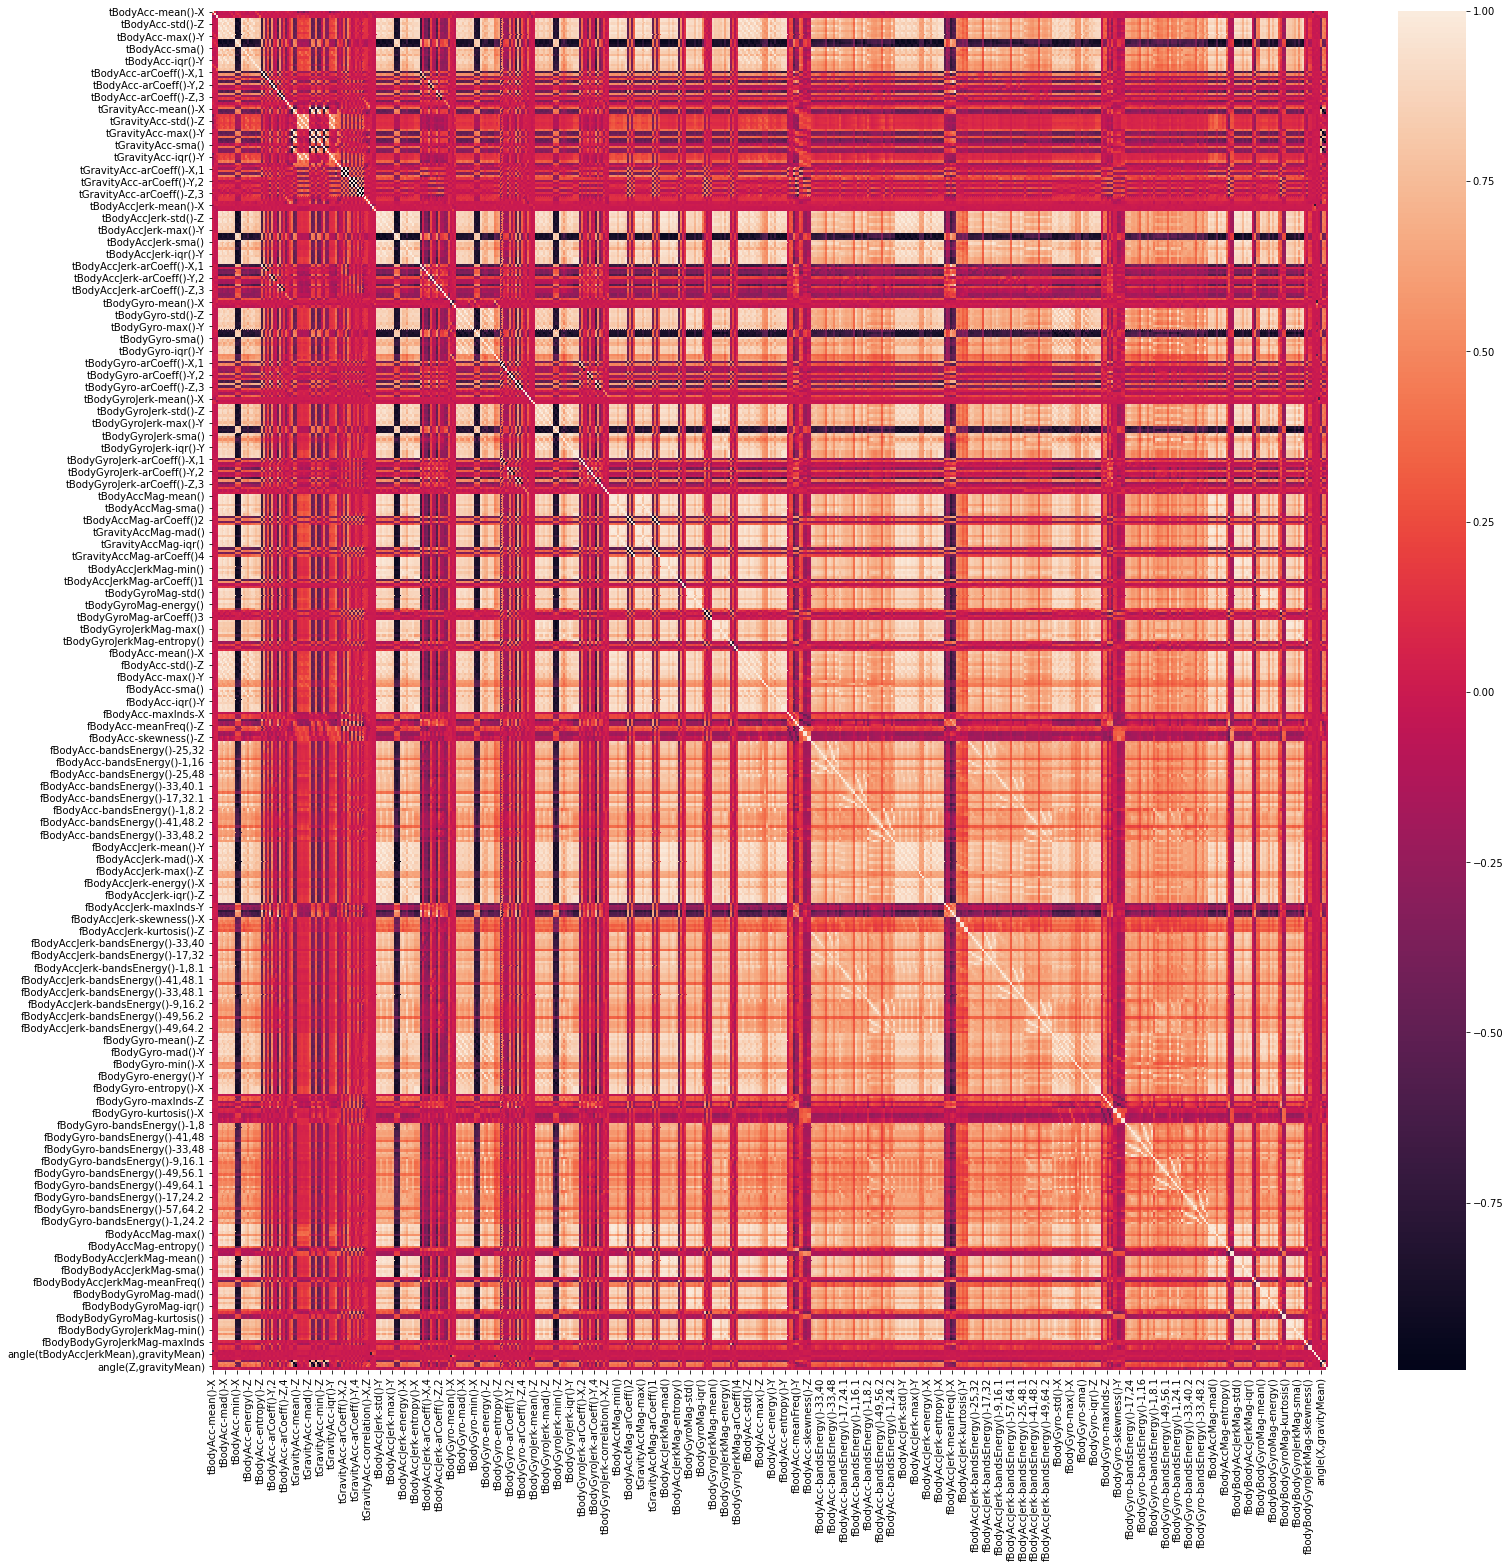

In [12]:
plt.figure(figsize=(25,25))
sns.heatmap(train.corr())

In [13]:
X_train = train.drop("Activity", axis=1)
y_train = train["Activity"]

X_test = test.drop("Activity", axis=1)
y_test = test["Activity"]

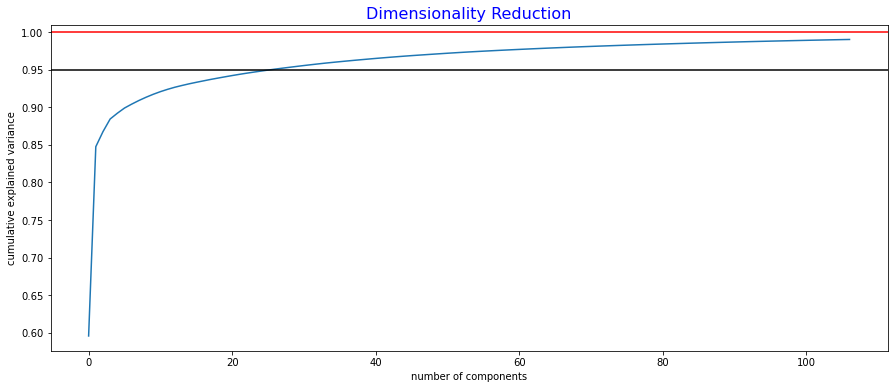

In [14]:
pca = PCA(n_components=107)
pca.fit(X_train)
plt.figure(figsize=(15,6))
plt.title("Dimensionality Reduction", c="blue", size=16)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y=1, c="red")
plt.axhline(y=0.95, c="black");

PCA explained variance ratio reaches 0.99 at 107 features. I will choose components value as 107.

In [15]:
pca = PCA(n_components=107)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

## Model building Without PCA

I will try the models before the PCA.

### Logistic Regression

In [16]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr =  lr.predict(X_test)

print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

[[537   0   0   0   0   0]
 [  1 427  61   0   0   2]
 [  0  18 514   0   0   0]
 [  0   0   0 485   4   7]
 [  0   0   0   6 405   9]
 [  0   0   0  23  10 438]]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.87      0.91       491
          STANDING       0.89      0.97      0.93       532
           WALKING       0.94      0.98      0.96       496
WALKING_DOWNSTAIRS       0.97      0.96      0.97       420
  WALKING_UPSTAIRS       0.96      0.93      0.94       471

          accuracy                           0.95      2947
         macro avg       0.95      0.95      0.95      2947
      weighted avg       0.95      0.95      0.95      2947



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
log_params = {"penalty":["l1", "l2", "elasticnet"],
              "C":[0.5, 1, 2, 3],
              "solver":["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
              "multi_class":["auto", "ovr", "multinomial"]}

grid = GridSearchCV(LogisticRegression(), param_grid=log_params, n_jobs=-1, cv=3).fit(X_train, y_train)
grid.best_params_

{'C': 3, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}

In [59]:
lr = LogisticRegression(C=3, multi_class="ovr", penalty="l1", solver="liblinear")
lr.fit(X_train, y_train)
y_pred_lr =  lr.predict(X_test)

print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

[[537   0   0   0   0   0]
 [  0 420  67   0   0   4]
 [  0  11 519   2   0   0]
 [  0   0   0 492   1   3]
 [  0   0   0   4 411   5]
 [  0   0   0  21   0 450]]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.86      0.91       491
          STANDING       0.89      0.98      0.93       532
           WALKING       0.95      0.99      0.97       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.97      0.96      0.96       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [60]:
cross_val_log = cross_val_score(LogisticRegression(C=3, multi_class="ovr", penalty="l1", solver="liblinear"), X_train, y_train, cv=5, n_jobs=-1).mean()
cross_val_log

0.9405671554821792

### Decision Tree Classifier

In [18]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)

print(confusion_matrix(y_test, y_pred_dtree))
print(classification_report(y_test, y_pred_dtree))

[[537   0   0   0   0   0]
 [  0 366 125   0   0   0]
 [  0  69 463   0   0   0]
 [  0   0   0 457  23  16]
 [  0   0   0  16 361  43]
 [  0   0   0  64  46 361]]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.84      0.75      0.79       491
          STANDING       0.79      0.87      0.83       532
           WALKING       0.85      0.92      0.88       496
WALKING_DOWNSTAIRS       0.84      0.86      0.85       420
  WALKING_UPSTAIRS       0.86      0.77      0.81       471

          accuracy                           0.86      2947
         macro avg       0.86      0.86      0.86      2947
      weighted avg       0.86      0.86      0.86      2947



In [61]:
dtree_params = {"criterion":["gini", "entropy"],
              "splitter":["best", "random"],
              "max_depth":[50,100,500],
              "min_samples_split":[2,3,4],
              "max_features":["auto", "sqrt", "log2"]}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid=dtree_params, n_jobs=-1, cv=3).fit(X_train, y_train)
grid.best_params_

{'criterion': 'gini',
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_split': 4,
 'splitter': 'best'}

In [62]:
dtree = DecisionTreeClassifier(criterion="gini", max_depth=100, max_features="auto", min_samples_split=4, splitter="best")
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)

print(confusion_matrix(y_test, y_pred_dtree))
print(classification_report(y_test, y_pred_dtree))

[[509  23   5   0   0   0]
 [  6 377 107   0   0   1]
 [  1  76 455   0   0   0]
 [  0   0   0 449  17  30]
 [  4   0   0  52 318  46]
 [  0   0   0  91  43 337]]
                    precision    recall  f1-score   support

            LAYING       0.98      0.95      0.96       537
           SITTING       0.79      0.77      0.78       491
          STANDING       0.80      0.86      0.83       532
           WALKING       0.76      0.91      0.83       496
WALKING_DOWNSTAIRS       0.84      0.76      0.80       420
  WALKING_UPSTAIRS       0.81      0.72      0.76       471

          accuracy                           0.83      2947
         macro avg       0.83      0.82      0.83      2947
      weighted avg       0.83      0.83      0.83      2947



In [19]:
cross_val_dtree = cross_val_score(DecisionTreeClassifier(), X_train, y_train, cv=5, n_jobs=-1).mean()
cross_val_dtree

0.8452194582795729

### Random Forest Classifier

In [20]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

print(confusion_matrix(y_test, y_pred_rfc))
print(classification_report(y_test, y_pred_rfc))

[[537   0   0   0   0   0]
 [  0 438  53   0   0   0]
 [  0  41 491   0   0   0]
 [  0   0   0 484   9   3]
 [  0   0   0  20 356  44]
 [  0   0   0  32   7 432]]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.89      0.90       491
          STANDING       0.90      0.92      0.91       532
           WALKING       0.90      0.98      0.94       496
WALKING_DOWNSTAIRS       0.96      0.85      0.90       420
  WALKING_UPSTAIRS       0.90      0.92      0.91       471

          accuracy                           0.93      2947
         macro avg       0.93      0.93      0.93      2947
      weighted avg       0.93      0.93      0.93      2947



In [63]:
rfc_params = {"n_estimators":[50, 100, 500],
              "max_depth":[50,100,500],
              "min_samples_split":[2,3,4],
              "max_features":["auto", "sqrt", "log2"]}

grid = GridSearchCV(RandomForestClassifier(), param_grid=rfc_params, n_jobs=-1, cv=3).fit(X_train, y_train)
grid.best_params_

{'max_depth': 500,
 'max_features': 'log2',
 'min_samples_split': 4,
 'n_estimators': 500}

In [ ]:
rfc = RandomForestClassifier(max_depth=500, max_features="log2", min_samples_split=4, n_estimators=500)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

print(confusion_matrix(y_test, y_pred_rfc))
print(classification_report(y_test, y_pred_rfc))

In [21]:
cross_val_rfc = cross_val_score(RandomForestClassifier(), X_train, y_train, cv=5, n_jobs=-1).mean()
cross_val_rfc

0.9181215055702772

### XGBoost

In [22]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

C:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:22:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[537   0   0   0   0   0]
 [  0 411  77   0   0   3]
 [  0  34 498   0   0   0]
 [  0   0   0 486   5   5]
 [  0   0   0   9 385  26]
 [  0   0   0  30   5 436]]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.92      0.84      0.88       491
          STANDING       0.87      0.94      0.90       532
           WALKING       0.93      0.98      0.95       496
WALKING_DOWNSTAIRS       0.97      0.92      0.94       420
  WALKING_UPSTAIRS       0.93      0.93      0.93       471

          accuracy                           0.93      2947
         macro avg       0.94      0.93     

In [ ]:
xgb_params = {'gamma': [0.5, 1, 1.5],
              'n_estimators': [50, 100, 500],
              'learning_rate':[0.01, 0.1, 1]}

grid = RandomizedSearchCV(XGBClassifier(), param_distributions=xgb_params, n_jobs=-1, cv=3).fit(X_train, y_train)
grid.best_params_

In [65]:
xgb = XGBClassifier(gamma=0.5, n_estimators=500, learning_rate=0.1)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

C:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:33:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[537   0   0   0   0   0]
 [  0 407  82   0   0   2]
 [  0  38 494   0   0   0]
 [  0   0   0 481  10   5]
 [  0   0   0   9 382  29]
 [  0   0   0  32   6 433]]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.83      0.87       491
          STANDING       0.86      0.93      0.89       532
           WALKING       0.92      0.97      0.94       496
WALKING_DOWNSTAIRS       0.96      0.91      0.93       420
  WALKING_UPSTAIRS       0.92      0.92      0.92       471

          accuracy                           0.93      2947
         macro avg       0.93      0.93     

In [67]:
cross_val_xgb = cross_val_score(XGBClassifier(), X_train, y_train, cv=5, n_jobs=-1).mean()
cross_val_xgb

0.9226081567909284

### Support Vector Machine

In [24]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

[[537   0   0   0   0   0]
 [  0 421  68   0   0   2]
 [  0  45 487   0   0   0]
 [  0   0   0 494   2   0]
 [  0   0   0  33 358  29]
 [  0   0   0  23   2 446]]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.90      0.86      0.88       491
          STANDING       0.88      0.92      0.90       532
           WALKING       0.90      1.00      0.94       496
WALKING_DOWNSTAIRS       0.99      0.85      0.92       420
  WALKING_UPSTAIRS       0.94      0.95      0.94       471

          accuracy                           0.93      2947
         macro avg       0.93      0.93      0.93      2947
      weighted avg       0.93      0.93      0.93      2947



In [68]:
svc_params = {'C': [0.1, 1, 5, 10],
              'gamma': [1, 0.1, 0.01]}

grid = GridSearchCV(SVC(), param_grid=svc_params, n_jobs=-1, cv=3).fit(X_train, y_train)
grid.best_params_

{'C': 1, 'gamma': 0.01}

In [69]:
svc = SVC(C=1, gamma=0.01)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

[[537   0   0   0   0   0]
 [  0 428  63   0   0   0]
 [  0  31 501   0   0   0]
 [  0   0   0 489   7   0]
 [  0   0   0  27 364  29]
 [  0   0   0  43   4 424]]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.93      0.87      0.90       491
          STANDING       0.89      0.94      0.91       532
           WALKING       0.87      0.99      0.93       496
WALKING_DOWNSTAIRS       0.97      0.87      0.92       420
  WALKING_UPSTAIRS       0.94      0.90      0.92       471

          accuracy                           0.93      2947
         macro avg       0.93      0.93      0.93      2947
      weighted avg       0.93      0.93      0.93      2947



In [25]:
cross_val_svc = cross_val_score(SVC(), X_train, y_train, cv=5, n_jobs=-1).mean()
cross_val_svc

0.8853449687148824

## Model building With PCA

In this part I applied model on PCA applied datasets.

### Logistic Regression

In [26]:
lr = LogisticRegression()
lr.fit(X_train_pca, y_train)
y_pred_lr_pca =  lr.predict(X_test_pca)

print(confusion_matrix(y_test, y_pred_lr_pca))
print(classification_report(y_test, y_pred_lr_pca))

[[537   0   0   0   0   0]
 [  0 416  72   0   0   3]
 [  0  22 510   0   0   0]
 [  0   0   0 492   3   1]
 [  0   0   0   3 397  20]
 [  0   0   0  31   1 439]]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.95      0.85      0.90       491
          STANDING       0.88      0.96      0.92       532
           WALKING       0.94      0.99      0.96       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.93      0.94       471

          accuracy                           0.95      2947
         macro avg       0.95      0.95      0.95      2947
      weighted avg       0.95      0.95      0.95      2947



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
log_params = {"penalty":["l1", "l2", "elasticnet"],
              "C":[0.5, 1, 2, 3],
              "solver":["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
              "multi_class":["auto", "ovr", "multinomial"]}

grid = GridSearchCV(LogisticRegression(), param_grid=log_params, n_jobs=-1, cv=3).fit(X_train_pca, y_train)
grid.best_params_

{'C': 1, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'liblinear'}

In [28]:
lr = LogisticRegression(C=1, multi_class="auto", penalty="l2", solver="liblinear")
lr.fit(X_train_pca, y_train), 
y_pred_lr_pca =  lr.predict(X_test_pca)

print(confusion_matrix(y_test, y_pred_lr_pca))
print(classification_report(y_test, y_pred_lr_pca))

[[537   0   0   0   0   0]
 [  0 417  70   0   0   4]
 [  0  24 508   0   0   0]
 [  0   0   0 494   2   0]
 [  0   0   0   4 410   6]
 [  0   0   0  21   1 449]]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.95      0.85      0.89       491
          STANDING       0.88      0.95      0.92       532
           WALKING       0.95      1.00      0.97       496
WALKING_DOWNSTAIRS       0.99      0.98      0.98       420
  WALKING_UPSTAIRS       0.98      0.95      0.97       471

          accuracy                           0.96      2947
         macro avg       0.96      0.95      0.96      2947
      weighted avg       0.96      0.96      0.95      2947



In [29]:
cross_val_log_pca = cross_val_score(LogisticRegression(C=1, multi_class="auto", penalty="l2", solver="liblinear"), X_train_pca, y_train, cv=5, n_jobs=-1).mean()
cross_val_log_pca

0.9273737611972048

### Decision Tree Classifier

In [30]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train_pca, y_train)
y_pred_dtree_pca = dtree.predict(X_test_pca)

print(confusion_matrix(y_test, y_pred_dtree_pca))
print(classification_report(y_test, y_pred_dtree_pca))

[[502  15  20   0   0   0]
 [  5 349 137   0   0   0]
 [  1 134 397   0   0   0]
 [  0   0   0 417  45  34]
 [  0   0   0  66 278  76]
 [  1   1   0  63  53 353]]
                    precision    recall  f1-score   support

            LAYING       0.99      0.93      0.96       537
           SITTING       0.70      0.71      0.71       491
          STANDING       0.72      0.75      0.73       532
           WALKING       0.76      0.84      0.80       496
WALKING_DOWNSTAIRS       0.74      0.66      0.70       420
  WALKING_UPSTAIRS       0.76      0.75      0.76       471

          accuracy                           0.78      2947
         macro avg       0.78      0.77      0.78      2947
      weighted avg       0.78      0.78      0.78      2947



In [31]:
dtree_params = {"criterion":["gini", "entropy"],
              "splitter":["best", "random"],
              "max_depth":[50,100,500],
              "min_samples_split":[2,3,4],
              "max_features":["auto", "sqrt", "log2"]}

grid = GridSearchCV(DecisionTreeClassifier(), param_grid=dtree_params, n_jobs=-1, cv=3).fit(X_train_pca, y_train)
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'splitter': 'best'}

In [32]:
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=100, max_features="sqrt", min_samples_split=4, splitter="best")
dtree.fit(X_train_pca, y_train)
y_pred_dtree_pca = dtree.predict(X_test_pca)

print(confusion_matrix(y_test, y_pred_dtree_pca))
print(classification_report(y_test, y_pred_dtree_pca))

[[365  93  56   9  11   3]
 [ 57 257 151  13   5   8]
 [ 41 117 341  28   1   4]
 [  7  25  19 350  67  28]
 [  7  21  12  93 243  44]
 [  2  13   6  58  59 333]]
                    precision    recall  f1-score   support

            LAYING       0.76      0.68      0.72       537
           SITTING       0.49      0.52      0.51       491
          STANDING       0.58      0.64      0.61       532
           WALKING       0.64      0.71      0.67       496
WALKING_DOWNSTAIRS       0.63      0.58      0.60       420
  WALKING_UPSTAIRS       0.79      0.71      0.75       471

          accuracy                           0.64      2947
         macro avg       0.65      0.64      0.64      2947
      weighted avg       0.65      0.64      0.64      2947



In [33]:
cross_val_dtree_pca = cross_val_score(DecisionTreeClassifier(criterion="entropy", max_depth=100, max_features="sqrt", min_samples_split=4, splitter="best"), X_train_pca, y_train, cv=5, n_jobs=-1).mean()
cross_val_dtree_pca

0.6028294880154645

### Random Forest Classifier

In [34]:
rfc = RandomForestClassifier()
rfc.fit(X_train_pca, y_train)
y_pred_rfc_pca = rfc.predict(X_test_pca)

print(confusion_matrix(y_test, y_pred_rfc_pca))
print(classification_report(y_test, y_pred_rfc_pca))

[[531   5   1   0   0   0]
 [  4 402  85   0   0   0]
 [  0  49 483   0   0   0]
 [  0   0   0 477  18   1]
 [  0   0   0  40 349  31]
 [  0   1   0  21  15 434]]
                    precision    recall  f1-score   support

            LAYING       0.99      0.99      0.99       537
           SITTING       0.88      0.82      0.85       491
          STANDING       0.85      0.91      0.88       532
           WALKING       0.89      0.96      0.92       496
WALKING_DOWNSTAIRS       0.91      0.83      0.87       420
  WALKING_UPSTAIRS       0.93      0.92      0.93       471

          accuracy                           0.91      2947
         macro avg       0.91      0.90      0.91      2947
      weighted avg       0.91      0.91      0.91      2947



In [35]:
rfc_params = {"n_estimators":[50, 100, 500],
              "max_depth":[50,100,500],
              "min_samples_split":[2,3,4],
              "max_features":["auto", "sqrt", "log2"]}

grid = GridSearchCV(RandomForestClassifier(), param_grid=rfc_params, n_jobs=-1, cv=3).fit(X_train_pca, y_train)
grid.best_params_

{'max_depth': 50,
 'max_features': 'log2',
 'min_samples_split': 2,
 'n_estimators': 500}

In [36]:
rfc = RandomForestClassifier(max_depth=50, max_features="log2", min_samples_split=2, n_estimators=500)
rfc.fit(X_train_pca, y_train)
y_pred_rfc_pca = rfc.predict(X_test_pca)

print(confusion_matrix(y_test, y_pred_rfc_pca))
print(classification_report(y_test, y_pred_rfc_pca))

[[537   0   0   0   0   0]
 [  6 411  74   0   0   0]
 [  0  44 488   0   0   0]
 [  0   0   0 483  13   0]
 [  0   0   0  36 357  27]
 [  0   0   0  16   9 446]]
                    precision    recall  f1-score   support

            LAYING       0.99      1.00      0.99       537
           SITTING       0.90      0.84      0.87       491
          STANDING       0.87      0.92      0.89       532
           WALKING       0.90      0.97      0.94       496
WALKING_DOWNSTAIRS       0.94      0.85      0.89       420
  WALKING_UPSTAIRS       0.94      0.95      0.94       471

          accuracy                           0.92      2947
         macro avg       0.92      0.92      0.92      2947
      weighted avg       0.92      0.92      0.92      2947



In [37]:
cross_val_rfc_pca = cross_val_score(RandomForestClassifier(max_depth=50, max_features="log2", min_samples_split=2, n_estimators=500), X_train_pca, y_train, cv=5, n_jobs=-1).mean()
cross_val_rfc_pca

0.892411566938128

### XGBoost

In [38]:
xgb = XGBClassifier()
xgb.fit(X_train_pca, y_train)
y_pred_xgb_pca = xgb.predict(X_test_pca)

print(confusion_matrix(y_test, y_pred_xgb_pca))
print(classification_report(y_test, y_pred_xgb_pca))

C:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:40:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[531   6   0   0   0   0]
 [  5 425  61   0   0   0]
 [  0  41 491   0   0   0]
 [  0   0   0 483  13   0]
 [  0   0   0  32 357  31]
 [  0   1   0  23  15 432]]
                    precision    recall  f1-score   support

            LAYING       0.99      0.99      0.99       537
           SITTING       0.90      0.87      0.88       491
          STANDING       0.89      0.92      0.91       532
           WALKING       0.90      0.97      0.93       496
WALKING_DOWNSTAIRS       0.93      0.85      0.89       420
  WALKING_UPSTAIRS       0.93      0.92      0.93       471

          accuracy                           0.92      2947
         macro avg       0.92      0.92     

In [54]:
xgb_params = {'gamma': [0.5, 1, 1.5],
              'n_estimators': [50, 100, 500],
              'learning_rate':[0.01, 0.1, 1]}

grid = RandomizedSearchCV(XGBClassifier(), param_distributions=xgb_params, n_jobs=-1, cv=3).fit(X_train_pca, y_train)
grid.best_params_

C:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:10:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'n_estimators': 500, 'learning_rate': 0.1, 'gamma': 0.5}

In [55]:
xgb = XGBClassifier(gamma=0.5, learning_rate=0.1, n_estimators=500)
xgb.fit(X_train_pca, y_train)
y_pred_xgb_pca = xgb.predict(X_test_pca)

print(confusion_matrix(y_test, y_pred_xgb_pca))
print(classification_report(y_test, y_pred_xgb_pca))

C:\Users\Lenovo\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:13:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[530   7   0   0   0   0]
 [  5 413  73   0   0   0]
 [  0  49 483   0   0   0]
 [  0   0   0 480  14   2]
 [  0   0   0  41 345  34]
 [  0   1   0  25  13 432]]
                    precision    recall  f1-score   support

            LAYING       0.99      0.99      0.99       537
           SITTING       0.88      0.84      0.86       491
          STANDING       0.87      0.91      0.89       532
           WALKING       0.88      0.97      0.92       496
WALKING_DOWNSTAIRS       0.93      0.82      0.87       420
  WALKING_UPSTAIRS       0.92      0.92      0.92       471

          accuracy                           0.91      2947
         macro avg       0.91      0.91     

In [46]:
cross_val_xgb_pca = cross_val_score(XGBClassifier(), X_train_pca, y_train, cv=5, n_jobs=-1).mean()
cross_val_xgb_pca

0.896496899235561

### Support Vector Machine

In [47]:
svc = SVC()
svc.fit(X_train_pca, y_train)
y_pred_svc_pca = svc.predict(X_test_pca)

print(confusion_matrix(y_test, y_pred_svc_pca))
print(classification_report(y_test, y_pred_svc_pca))

[[537   0   0   0   0   0]
 [  0 421  69   0   0   1]
 [  0  37 495   0   0   0]
 [  0   0   0 489   7   0]
 [  0   0   0  33 360  27]
 [  0   0   0  37   5 429]]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.92      0.86      0.89       491
          STANDING       0.88      0.93      0.90       532
           WALKING       0.87      0.99      0.93       496
WALKING_DOWNSTAIRS       0.97      0.86      0.91       420
  WALKING_UPSTAIRS       0.94      0.91      0.92       471

          accuracy                           0.93      2947
         macro avg       0.93      0.92      0.93      2947
      weighted avg       0.93      0.93      0.93      2947



In [51]:
svc_params = {'C': [0.1, 1, 5, 10],
              'gamma': [1, 0.1, 0.01]}

grid = GridSearchCV(SVC(), param_grid=svc_params, n_jobs=-1, cv=3).fit(X_train_pca, y_train)
grid.best_params_

{'C': 1, 'gamma': 0.01}

In [52]:
svc = SVC(C=1, gamma=0.1)
svc.fit(X_train_pca, y_train)
y_pred_svc_pca = svc.predict(X_test_pca)

print(confusion_matrix(y_test, y_pred_svc_pca))
print(classification_report(y_test, y_pred_svc_pca))

[[537   0   0   0   0   0]
 [  6 418  67   0   0   0]
 [  2  54 476   0   0   0]
 [  0   0   0 313 180   3]
 [  1   0   0   5 376  38]
 [  0   0   0  66  79 326]]
                    precision    recall  f1-score   support

            LAYING       0.98      1.00      0.99       537
           SITTING       0.89      0.85      0.87       491
          STANDING       0.88      0.89      0.89       532
           WALKING       0.82      0.63      0.71       496
WALKING_DOWNSTAIRS       0.59      0.90      0.71       420
  WALKING_UPSTAIRS       0.89      0.69      0.78       471

          accuracy                           0.83      2947
         macro avg       0.84      0.83      0.82      2947
      weighted avg       0.85      0.83      0.83      2947



In [53]:
cross_val_svm_pca = cross_val_score(SVC(), X_train_pca, y_train, cv=5, n_jobs=-1).mean()
cross_val_svm_pca

0.8410169397466669

## Evaluation

I created a dataframe from the models' cross validation results.

In [70]:
final = pd.DataFrame({"model" : ["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost", "SVM", 
                                 "Logistic Regression wit PCA", "Decision Tree with PCA", "Random Forest with PCA", "XGBoost with PCA", "SVM with PCA"],
                      "Cross Validation Score" : [cross_val_log, cross_val_dtree, cross_val_rfc, cross_val_xgb, cross_val_svc,
                           cross_val_log_pca, cross_val_dtree_pca, cross_val_rfc_pca, cross_val_xgb_pca, cross_val_svm_pca]})

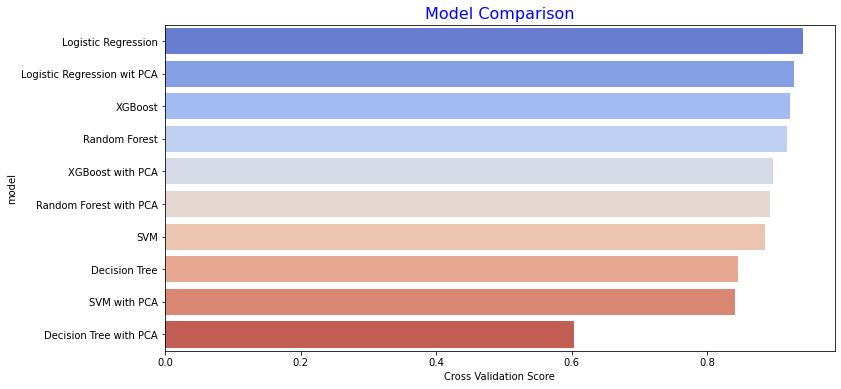

In [85]:
plt.figure(figsize=(12,6))
plt.title("Model Comparison", c="blue", size=16)
sns.barplot(y="model", x="Cross Validation Score", data=final,
            order=final.sort_values(by="Cross Validation Score", ascending=False)["model"].values,
            palette="coolwarm");

Cross validation result of Logistic Regression has the highest score. So that, I choose Logistic Regression for this project.